# Contents
#### Line chart of incidents over time
#### Decompose chart and run Dickey-Fuller test for stationarity
#### Check for autocorrelations

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [3]:
#import data

# Define path to directory and file name
directory = r"C:\Users\agwsi\CF\6. Advanced Analytics and Dashboard design\Project folder\3. Prepared Data"
filename = "fire_incidents_hour_column_after_64.csv"


# Create the full path using os.path.join
path = os.path.join(directory, filename)

# Import data and parse dates directly with dayfirst=True
tfire = pd.read_csv(
    path,
    parse_dates=[
        'date_of_ext_agent_defer', 'date_of_last_TFS_clear', 'date_of_fire_under_control',
        'date_of_TFS_alarm', 'date_of_TFS_arrival'
    ],
    dtype={'cost_dollars': 'int64'},
    index_col=False,  
    dayfirst=True  
)

In [4]:
# enable full view of all columns
pd.set_option('display.max_columns', None)

In [5]:
tfire.columns

Index(['Unnamed: 0', 'incident_station_area', 'incident_ward', 'latitude',
       'longitude', 'area_of_origin', 'extent_of_fire',
       'first_material_ignited', 'ignition_source', 'possible_cause',
       'alarm_presence', 'alarm_operation', 'alarm_failure', 'alarm_type',
       'alarm_impact_on_evac', 'date_of_TFS_alarm', 'time_of_TFS_alarm',
       'date_of_TFS_arrival', 'time_of_TFS_arrival', 'date_of_ext_agent_defer',
       'time_of_ext_agent_defer', 'date_of_fire_under_control',
       'time_of_fire_under_control', 'date_of_last_TFS_clear',
       'time_of_last_TFS_clear', 'fire_staus_at_arrival', 'control_method',
       'business_impact', 'cost_dollars', 'persons_displaced',
       'civilian_casualties', 'persons_rescued', 'response_time_seconds',
       'response_category', 'alarm_failure_category', 'cause_category',
       'month', 'hour', 'meal_time', 'incident_count'],
      dtype='object')

## Create line chart

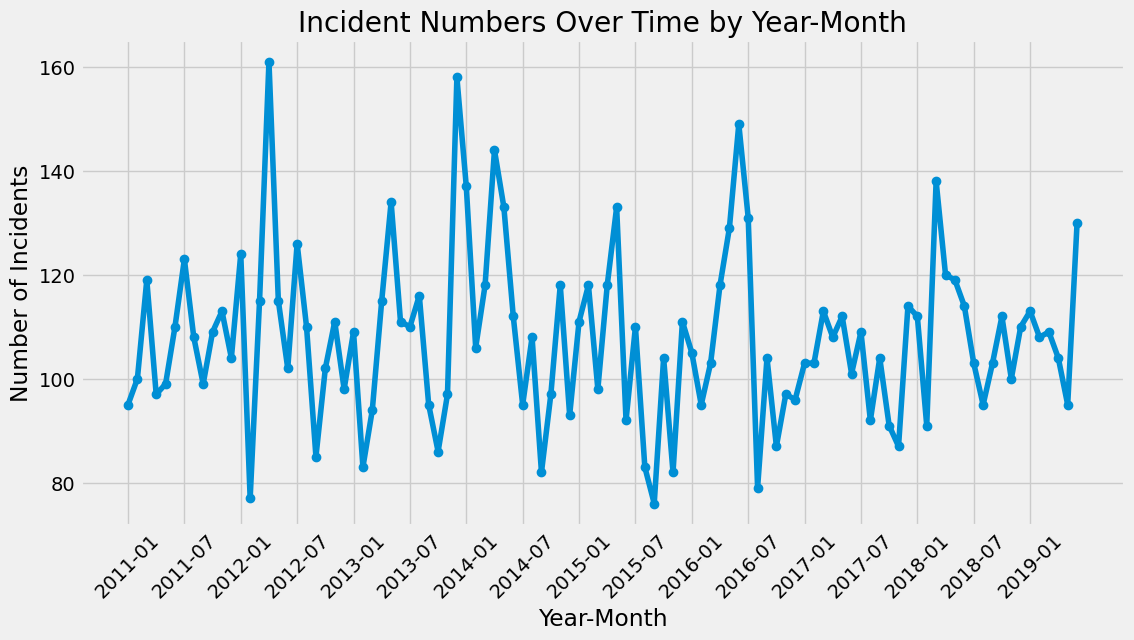

In [7]:
# Group by the extracted 'year_month' and calculate incident counts
tfire['year_month'] = tfire['date_of_TFS_arrival'].dt.to_period('M')

grouped_data = tfire.groupby('year_month').size().reset_index(name='incident_count')

# Create line chart
plt.figure(figsize=(12, 6))
plt.plot(grouped_data['year_month'].astype(str), grouped_data['incident_count'], marker='o')
plt.xlabel('Year-Month')
plt.ylabel('Number of Incidents')
plt.title('Incident Numbers Over Time by Year-Month')

# Show only every 6th month
xtick_positions = grouped_data.index[::6] 
xtick_labels = grouped_data['year_month'].astype(str)[::6]  

plt.xticks(ticks=xtick_positions, labels=xtick_labels, rotation=45)
plt.grid(True)
plt.show()


## Decompose chart

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(grouped_data['incident_count'], model='additive', period=12)

In [10]:
from pylab import rcParams

rcParams['figure.figsize'] = 18, 7

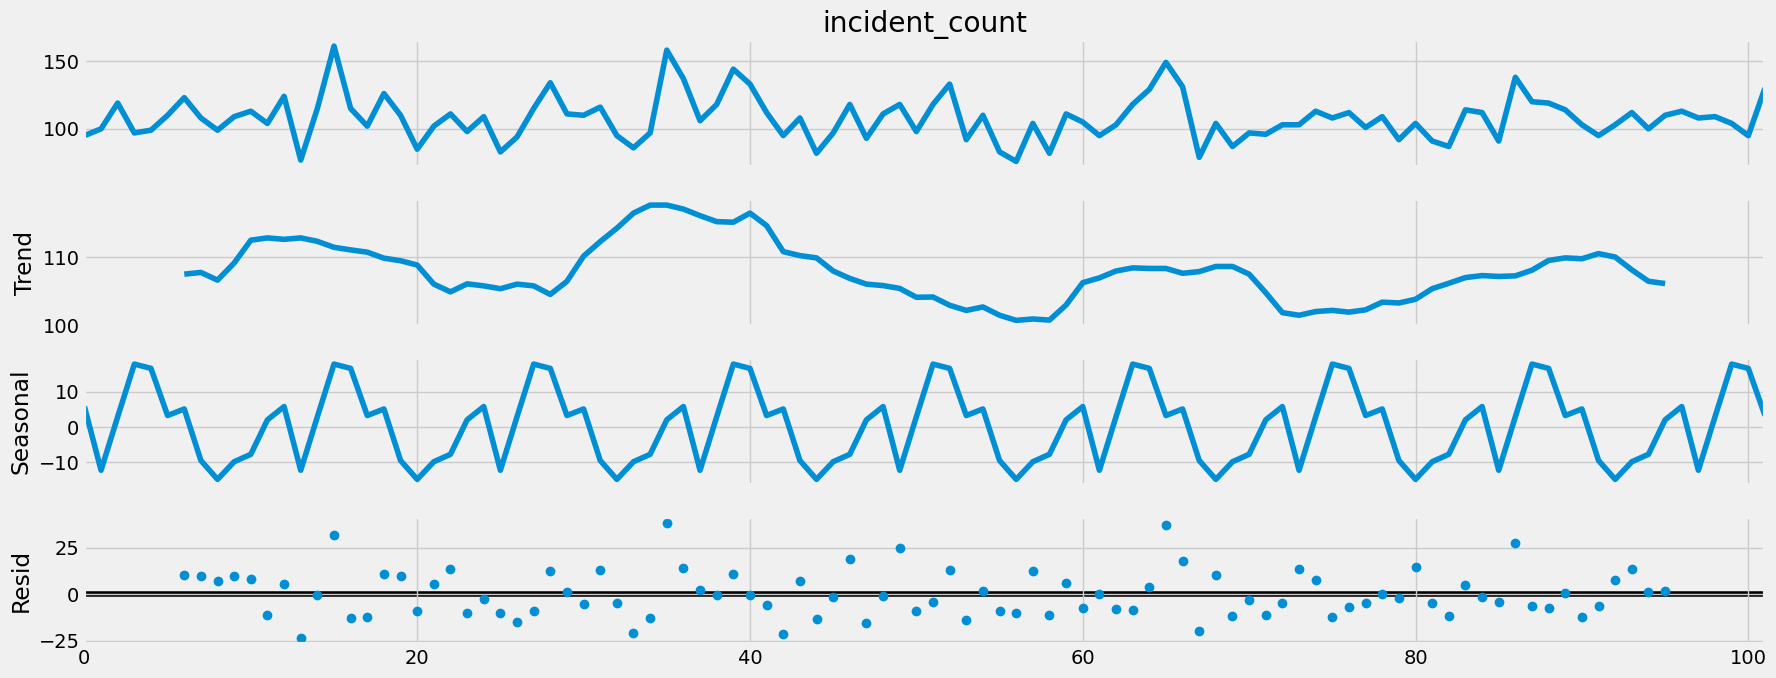

In [11]:
# Show graph

decomposition.plot()
plt.show()

#### Trend: The trend component appears to be relatively flat, suggesting that there's no strong upward or downward trend in the overall incident count over time.
#### Seasonal: The seasonal component shows a clear cyclical pattern, indicating that there might be recurring seasonal variations in the incident count. The peaks and troughs suggest a potential yearly cycle.
#### Residuals: The residual component seems to be centered around zero, with some fluctuations.

In [13]:
from statsmodels.tsa.stattools import adfuller

# Prepare the data for the Dickey-Fuller test
incident_counts = grouped_data['incident_count'].values

# Perform the Dickey-Fuller test
DFT = adfuller(incident_counts)

# Print the test results
print("Dickey-Fuller Stationarity test:", DFT[0])
print("p-value:", DFT[1])
print("Critical Values:")
for key, value in DFT[4].items():
    print(f"\t{key}: {value}")

Dickey-Fuller Stationarity test: -5.14899883165066
p-value: 1.116393905318993e-05
Critical Values:
	1%: -3.4989097606014496
	5%: -2.891516256916761
	10%: -2.5827604414827157


### Based on the test results, the time series data appears to be stationary.

#### Since the test statistic is less than the critical values and the p-value is significantly small, we can reject the null hypothesis of the Dickey-Fuller test. This suggests that the time series data is stationary.

## Check for autocorrelations

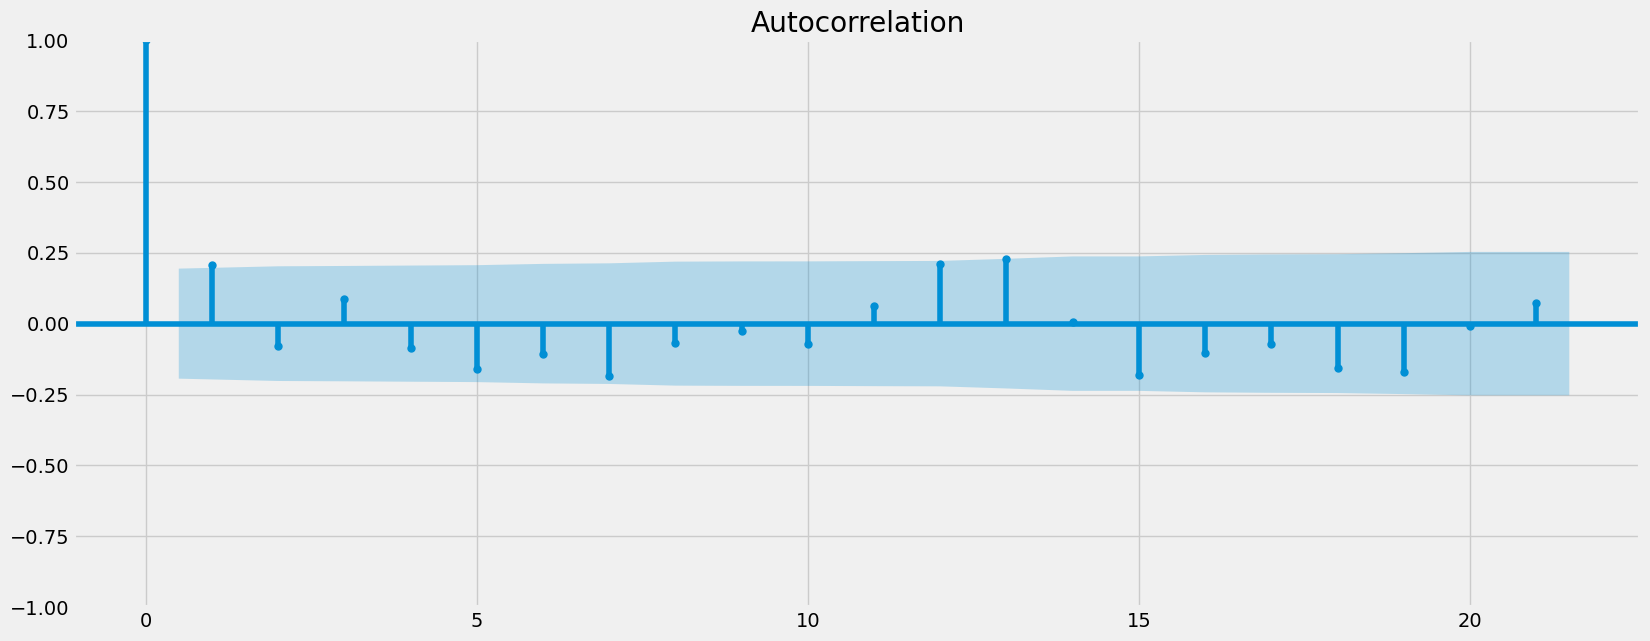

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(incident_counts)
plt.show()